In this assignment, we analyze the MNIST handwritten digits dataset using <br>
neural networks. The dataset consists of greyscale images of hand written digits <br>
0, 1, . . . , 9 that have been normalized to 28 × 28 bitmap images. Each image is <br>
accompanied by the correct label. We will construct a classifier that classifies <br>
the images to their correct labels.

## Problem 1
Set up PyTorch in your Anaconda environment. The following invocation should <br>
install the CPU only version: <br>
```bash
conda install -c pytorch pytorch torchvision cpuonly <br>
```
Load the dataset (both training and test set) using the torchvision.datasets <br>
module. Note that the you probably want to use the transform option to <br>
convert the images into Tensors. By default, the images come as PIL1 images. <br>
Use matplotlib to plot some images in greyscale, and include at least one <br>
from each set in your report. Verify that the images have the correct dimensions <br>
(28 × 28) and scale for values (values should be normalized to be in range [0, 1]).

torch.Size([10000, 28, 28])
torch.Size([60000, 28, 28])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

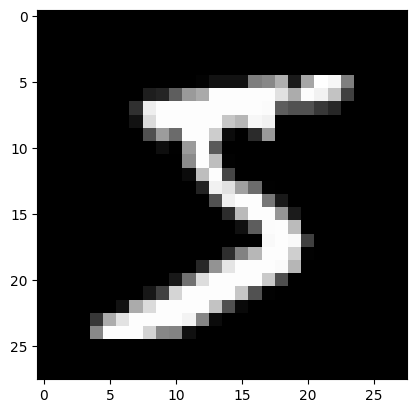

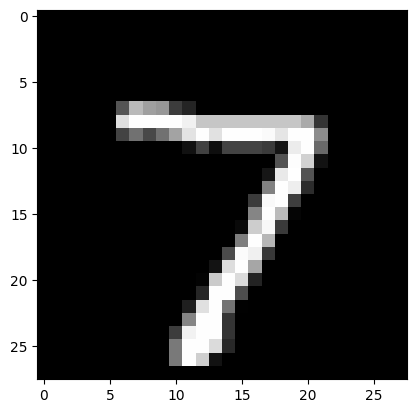

In [45]:
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms

transformer = transforms.Compose([transforms.ToTensor()])
train_set = MNIST(root='./data', download=True, transform=transformer, train=True)
test_set = MNIST(root='./data', download=True, transform=transformer, train=False)

# Test data is 10000 examples of 28x28
print(test_set.data.shape)
# Train data is 60000 examples of 28x28
print(train_set.data.shape)

# Normalize the tensors, dividing by the max color value of 255 
train_set.data = train_set.data.float() / 255
test_set.data = test_set.data.float() / 255

# Print the first image in the training and test sets to show the normalisation
print(train_set.data[0])
print(test_set.data[0])

# Show the first training image as a nparray mapped to a grayscale image
plt.imshow(train_set.data[0].numpy(), cmap='gray')
plt.show()
plt.imshow(test_set.data[0].numpy(), cmap='gray')
plt.show()

## Problem 2
Construct a fully-connected feedforward network with one hidden layer. Use <br>
the ReLU as the activation function. Train the network for at least 10 epochs <br>
using stochastic gradient descent (torch.optim.SGD) for optimization and cross <br>
entropy loss (torch.nn.CrossEntropyLoss) for loss function. Report the vali- <br>
dation accuracy of your network (with respect to the test set) after each epoch. <br>
Report all relevant parameters you chose.

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(28*28, 10),
    nn.ReLU(),
    nn.Linear(10, 1), # No acitvation function in ouput layer as this was not mentioned in the task
)

loss_function = nn.CrossEntropyLoss()
# Using a learning rate of 0.01 as its a common starting point.
optimizer = optim.SGD(model.parameters(), lr=0.01)

N_EPOCHS = 3

for i in range(N_EPOCHS):
    for image in train_set:
        image_vec = image[0].flatten()
        optimizer.zero_grad()
        output = model(image_vec)
        loss = loss_function(output, torch.tensor(image[1]))
        loss.backward()
        optimizer.step()

IndexError: Target 5 is out of bounds.